In [9]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
base = os.path.dirname(os.getcwd())
stats_path = os.path.join(base, 'csv files', 'For_Stats.csv')

stats_df = pd.read_csv(stats_path)

In [11]:
stats_df

,rank,competition,name,nation,startnr,total,tech,pcs,deductions,element,...,judge_nation,judge_goe,panel_median,is_same,goe_dist,higher,lower,pt_bias,s_progression,prestige
0,1,ec2020SEG001OF,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,4S+2T,...,GEO,1.0,2.0,0,-1.0,0,1,0,0.54,0.06
1,1,ec2020SEG001OF,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,3F,...,GEO,2.0,3.0,0,-1.0,0,1,0,0.54,0.06
2,1,ec2020SEG001OF,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,FSSp4,...,GEO,3.0,3.0,0,0.0,0,0,0,0.54,0.06
3,1,ec2020SEG001OF,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,3A,...,GEO,3.0,3.0,0,0.0,0,0,0,0.54,0.06
4,1,ec2020SEG001OF,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,StSq4,...,GEO,2.0,4.0,0,-2.0,0,1,0,0.54,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209614,24,wc2025SEG004OF,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,2A+2T,...,FRA,0.0,0.0,0,0.0,0,0,0,0.67,0.00
209615,24,wc2025SEG004OF,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,3Sq+2T,...,FRA,-5.0,-5.0,0,0.0,0,0,0,0.67,0.00
209616,24,wc2025SEG004OF,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,LSp2,...,FRA,-1.0,1.0,0,-2.0,0,1,0,0.67,0.00
209617,24,wc2025SEG004OF,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,StSq3,...,FRA,-2.0,0.0,0,-2.0,0,1,0,0.67,0.00


In [12]:
judges_higher = (stats_df.groupby('judge_name')['goe_dist'].mean().sort_values(ascending=False).head(10))
judges_higher


judge_name
Patricia MORITZ     0.605322
Patty KLEIN         0.384196
Karin EHRHARDT      0.347382
Elizabeth RYAN      0.331719
Soo Kyung LEE       0.331034
Veronique VERRUE    0.328975
Senem AHISKAL       0.297650
Slobodan DELIC      0.292398
Samuel AUXIER       0.277533
Pekka LESKINEN      0.275676
Name: goe_dist, dtype: float64

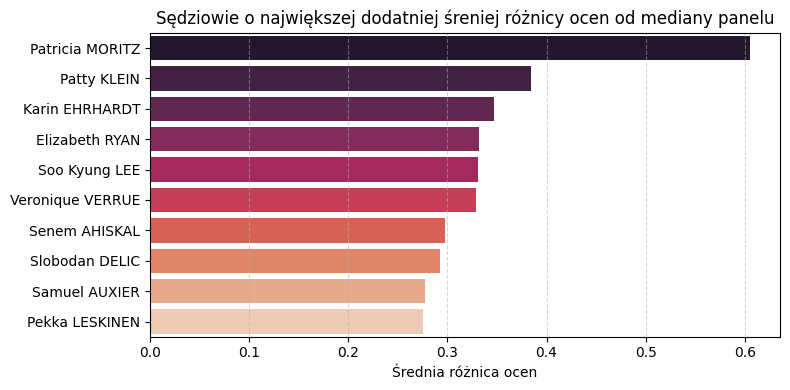

In [13]:
plt.figure(figsize=(8, 4))
sns.barplot(x=judges_higher.values, y=judges_higher.index, palette='rocket', hue=judges_higher.index)

plt.title('Sędziowie o największej dodatniej śreniej różnicy ocen od mediany panelu')
plt.ylabel('')
plt.xlabel('Średnia różnica ocen')

plt.tight_layout()
plt.grid(axis='x',  linestyle='--', alpha=0.5)
plt.show()

In [14]:
judges_lower = stats_df.groupby('judge_name')['goe_dist'].mean().sort_values(ascending=True).head(10)
judges_lower

judge_name
Jia YAO            -0.474097
Leslie KEEN        -0.443359
Lisa DAVIDSON      -0.430884
Kari-Anne OLSEN    -0.376000
Lisa JELINEK       -0.364444
Anne CAMMETT       -0.358586
Young Kyung HAN    -0.350694
Ursula STAHL       -0.345938
Elisabeth BINDER   -0.307692
Ron CONACHER       -0.291339
Name: goe_dist, dtype: float64

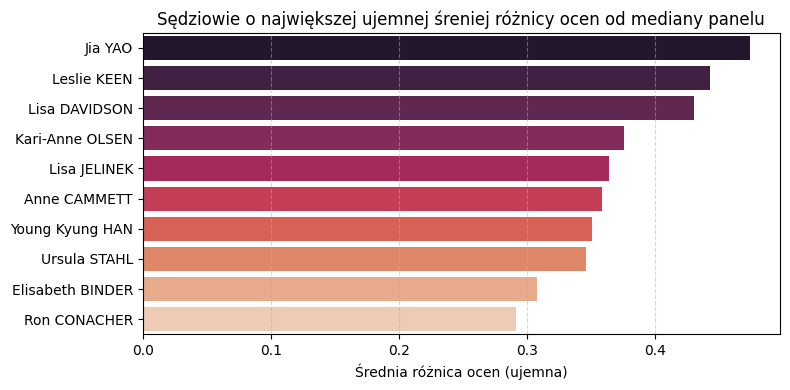

In [15]:
plt.figure(figsize=(8, 4))
sns.barplot(x=judges_lower.values * -1, y=judges_lower.index, palette='rocket', hue=judges_lower.index)

plt.title('Sędziowie o największej ujemnej śreniej różnicy ocen od mediany panelu')
plt.ylabel('')
plt.xlabel('Średnia różnica ocen (ujemna)')

plt.tight_layout()
plt.grid(axis='x',  linestyle='--', alpha=0.5)
plt.show()